# Import Statements

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [4]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [6]:
df_unemployment.shape
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [7]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ', df_unemployment.UE_BENEFITS_WEB_SEARCH.max())

Largest value for "Unemployemnt Benefits" in Web Search:  100


### Bitcoin

In [9]:

df_btc_search.shape
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [10]:
print(f'largest BTC News Search: ', df_btc_search.BTC_NEWS_SEARCH.max())

largest BTC News Search:  100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [11]:
#Checking missing values for Tesla 
df_tesla.isna().values.any()

False

In [12]:
#Checking missing values for BTC Search 

df_btc_search.isna().values.any()

False

In [13]:
#Checking missing values for BTC PRICE 

df_btc_price.isna().values.any()

True

In [14]:
#Checking missing values for Unemployment 
df_unemployment.isna().values.any()


False

In [19]:
#CHECK MISSING VALUES AND REMOVE 
df_btc_price.isna().values.sum()
df_btc_price[df_btc_price.CLOSE.isna()]

#DROP ALL MISSING COLUMNS 
df_btc_price.dropna(inplace=True)

#Check if succesfully removed or not 
df_btc_price.isna().values.any()

False

### Convert Strings to DateTime Objects

In [24]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)


### Converting from Daily to Monthly Data



In [26]:
df_btc_montly = df_btc_price.resample("M",on="DATE").last()

In [27]:
df_btc_montly

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


# Data Visualisation

In [38]:
# Create locators for ticks on the time axis
year= mdates.YearLocator()
month = mdates.MonthLocator()
year_formatter = mdates.DateFormatter("%Y")

In [31]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


### Tesla Stock Price v.s. Search Volume

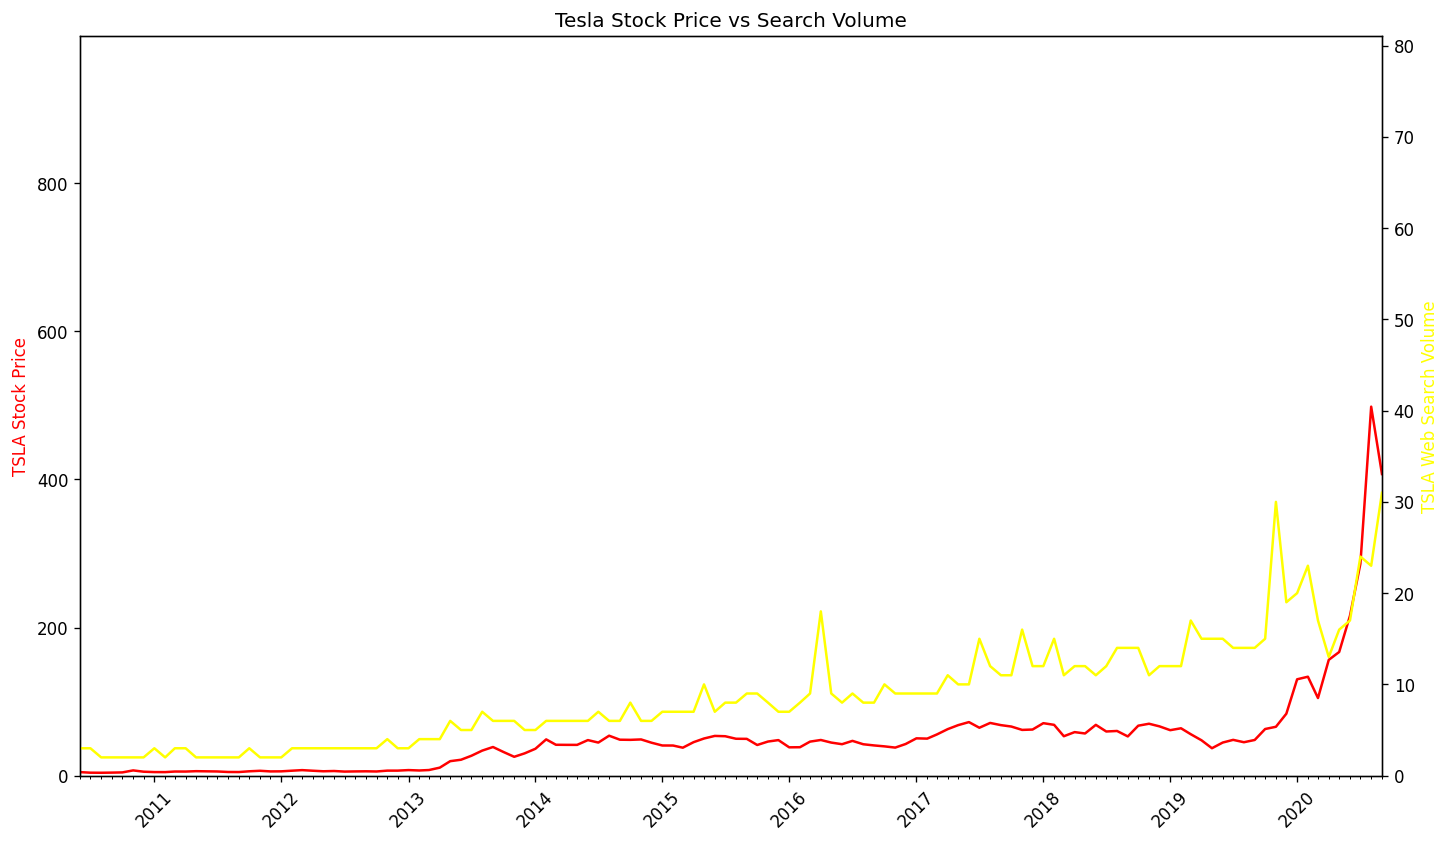

In [41]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla Stock Price vs Search Volume")
plt.xticks(rotation =45)

ax1=plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim([0,max(df_tesla.TSLA_USD_CLOSE.max(),df_tesla.TSLA_WEB_SEARCH.max())+500])
ax2.set_ylim([0,df_tesla.TSLA_WEB_SEARCH.max()+50])
ax1.set_ylabel("TSLA Stock Price",color="r")
ax2.set_ylabel("TSLA Web Search Volume", color = "yellow")
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_formatter)
ax1.xaxis.set_minor_locator(month)
ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,color="red")
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,color="yellow")
plt.show()


### Bitcoin (BTC) Price v.s. Search Volume

In [ ]:
plt.figure(figsize=(14,8),dpi=120)
plt.title("Bitcoin News Search vs Resampled Price",fontsize=18)
plt.xticks(rotation=45)
ax1=plt.gca()
ax2= ax1.twinx()
ax1.set_ylabel("BTC Price",fontsize =14, color="orange")
ax2.set_ylabel("Search Trend",fontsize = 14, color="blue")
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_formatter)
ax1.xaxis.set_minor_locator(month)
ax1.set_ylim([0,df_btc_price.CLOSE.max() +1000])
ax2.set_ylim(0,df_btc_search.BTC_NEWS_SEARCH.max()+55)
ax1.set_xlim([df_btc_montly.index.min(), df_btc_montly.index.max()])
ax1.plot(df_btc_montly.index,df_btc_montly.CLOSE, color="orange",linewidth=3, linestyle='--')
ax2.plot(df_btc_montly.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

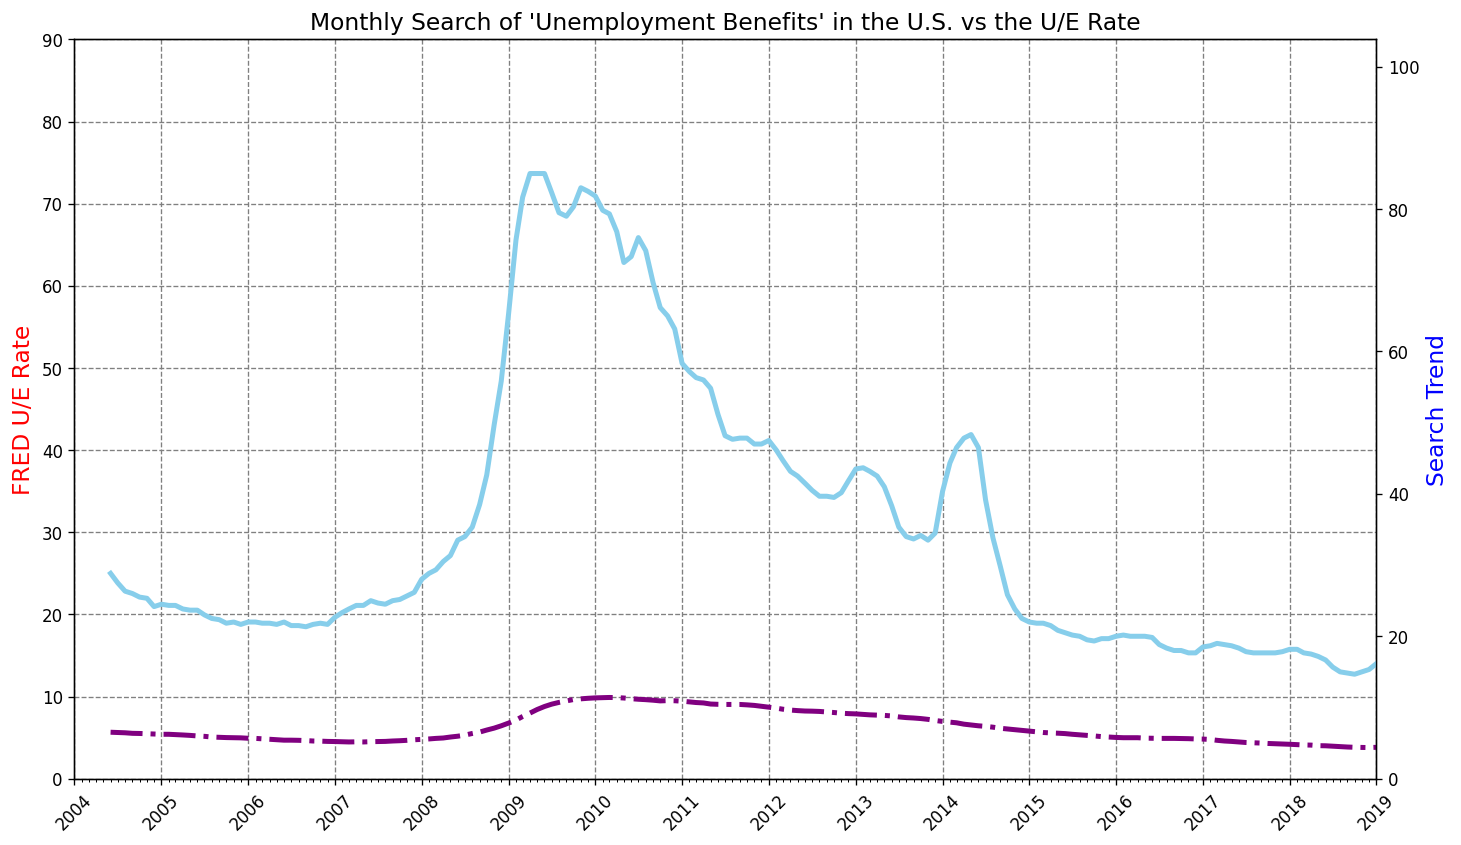

In [62]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

plt.figure(figsize=(14,8),dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate",fontsize =14)
plt.xticks(rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color='grey', linestyle='--')
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_formatter)
ax1.xaxis.set_minor_locator(month)
ax1.set_ylabel("FRED U/E Rate",fontsize=14,color="red")
ax2.set_ylabel("Search Trend",fontsize=14,color="blue")

ax1.set_ylim(0,roll_df.UE_BENEFITS_WEB_SEARCH.max()+5)
ax2.set_ylim(0,roll_df.UNRATE.max()*10 +5)

ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color='purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


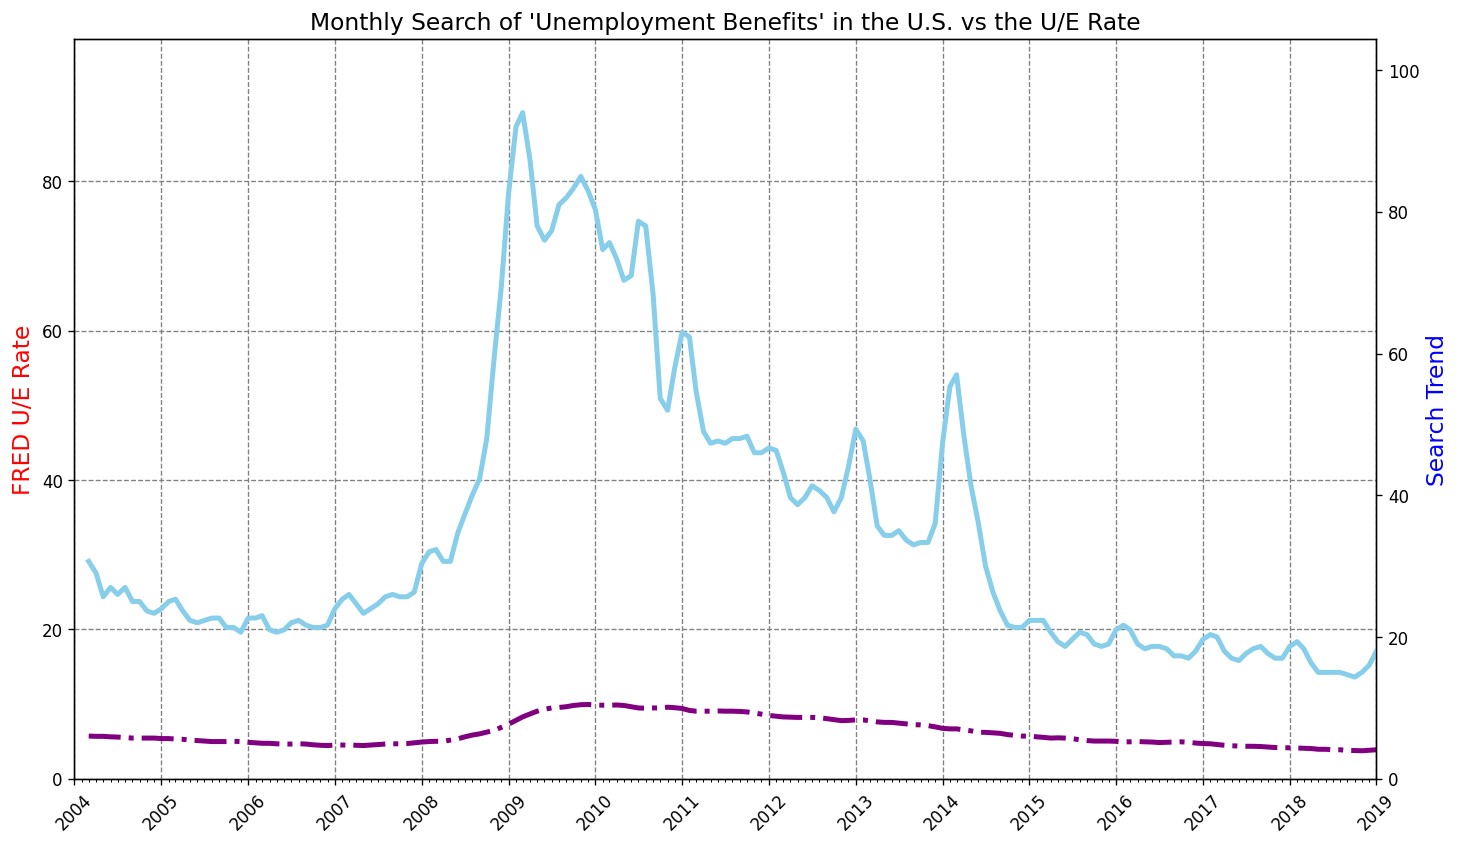

In [66]:
roll_df3 = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=3).mean()

plt.figure(figsize=(14,8),dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate",fontsize =14)
plt.xticks(rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color='grey', linestyle='--')
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_formatter)
ax1.xaxis.set_minor_locator(month)
ax1.set_ylabel("FRED U/E Rate",fontsize=14,color="red")
ax2.set_ylabel("Search Trend",fontsize=14,color="blue")

ax1.set_ylim(0,roll_df3.UE_BENEFITS_WEB_SEARCH.max()+5)
ax2.set_ylim(0,roll_df3.UNRATE.max()*10 +5)

ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.plot(df_unemployment.MONTH, roll_df3.UNRATE, color='purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df3.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)
plt.show()

### Including 2020 in Unemployment Charts

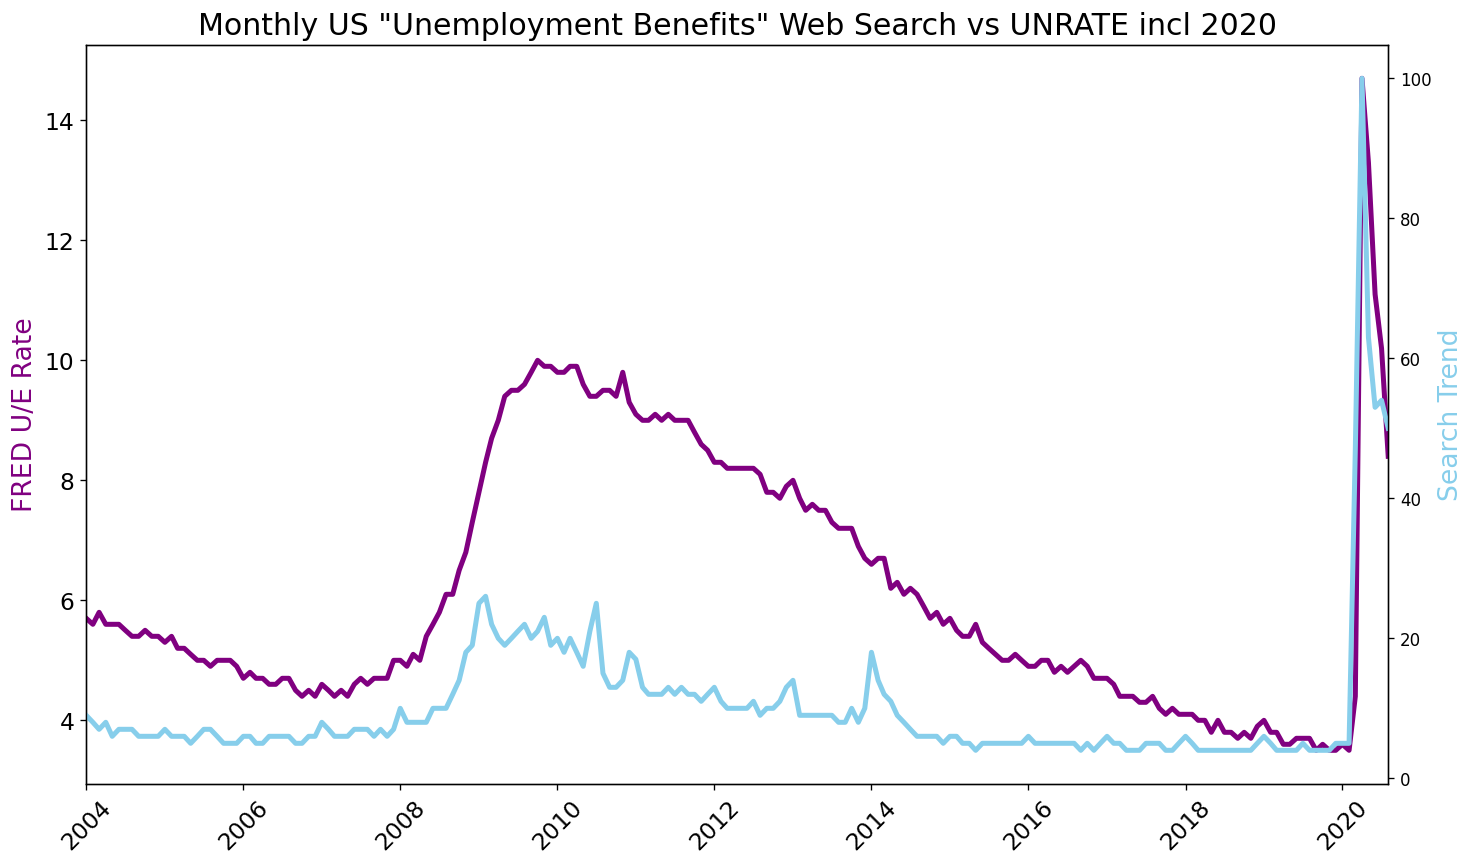

In [68]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()